In [1]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [11]:
isole = {}
for isola in range(7):
    isole.update({isola+1: (isola+1)*1000})

In [3]:
print(isole)

{1: 1000, 2: 2000, 3: 3000, 4: 4000, 5: 5000, 6: 6000, 7: 7000}


In [4]:
# 1=testa -1=croce
def lancio_della_moneta():
    return (-1) ** np.random.randint(2)

# percentuale da 0 a 1
def giro_di_roulette():
    return np.random.random()

def simulazione(isole=None, spostamenti=500):
    percorso = [np.random.choice(list(isole))]

    for spostamento in range(spostamenti-1):
        prossima_isola = percorso[-1] + lancio_della_moneta()
        if (
            not prossima_isola or 
            prossima_isola > len(isole)
        ):
            percorso.append(percorso[-1])
            continue
        if prossima_isola > percorso[-1]:
            percorso.append(prossima_isola)
            continue
        p_spostamento = prossima_isola / percorso[-1]
        if giro_di_roulette() < p_spostamento:
            percorso.append(prossima_isola)
        else:
            percorso.append(percorso[-1])

    return percorso

In [48]:
def simulazione2(isole=None, spostamenti=500):
    percorso = [np.random.choice(list(isole))]

    for spostamento in range(spostamenti-1):
        prossima_isola = percorso[-1] + lancio_della_moneta()
        if (
            not prossima_isola or 
            prossima_isola > len(isole)
        ):
            percorso.append(percorso[-1])
            continue
        if isole[prossima_isola] > isole[percorso[-1]]:
            percorso.append(prossima_isola)
            continue
        p_spostamento = isole[prossima_isola] / isole[percorso[-1]]
        if giro_di_roulette() < p_spostamento:
            percorso.append(prossima_isola)
        else:
            percorso.append(percorso[-1])

    return percorso

In [12]:
percorso_A = simulazione(isole, spostamenti=1000)
percorso_B = simulazione(isole, spostamenti=2000)
percorso_C = simulazione(isole, spostamenti=3000)

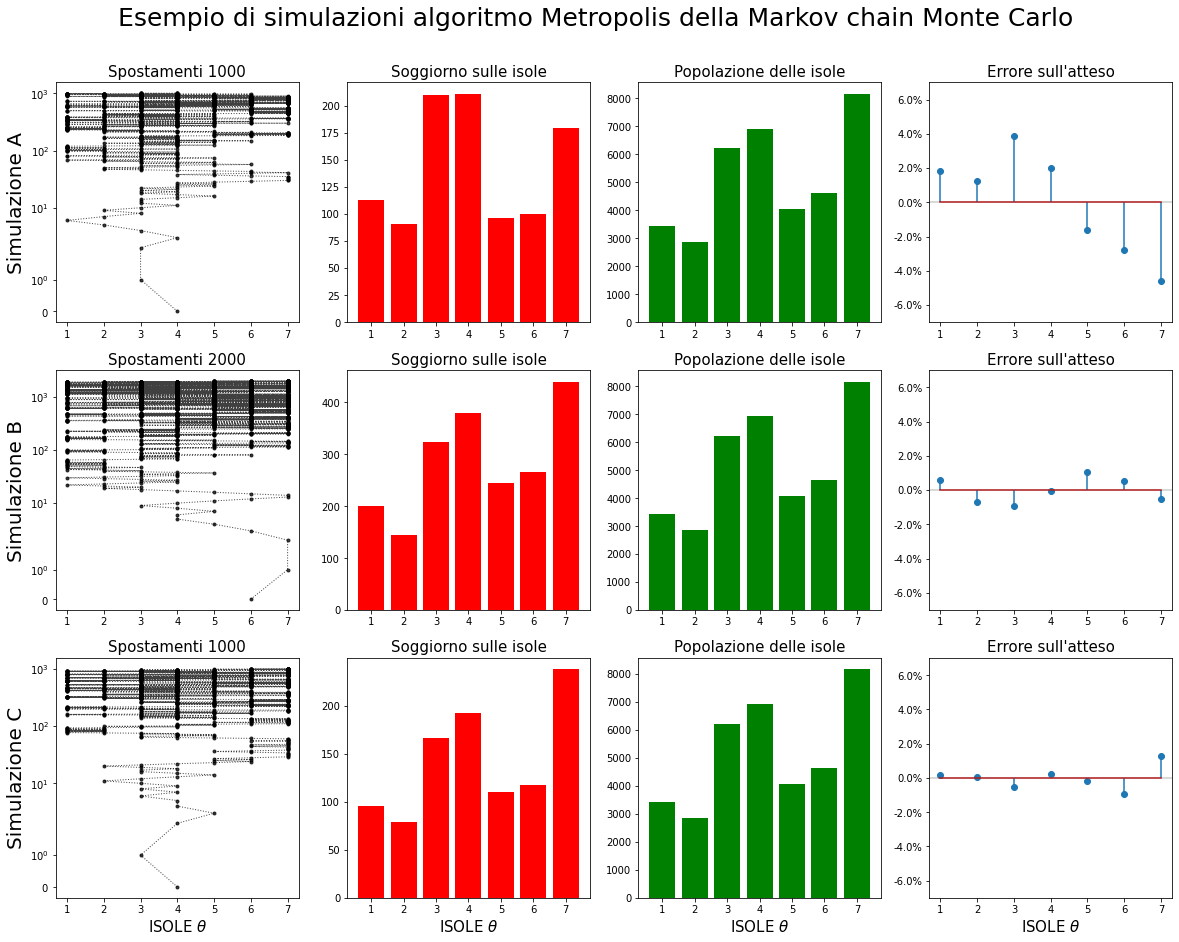

In [17]:
fig, ax = plt.subplots(3, 4, figsize=(20,15))

fig.suptitle(
    "Esempio di simulazioni algoritmo Metropolis della Markov chain Monte Carlo",
    fontsize=25, y=.95
)

ax[0,0].set_ylabel("Simulazione A", fontsize=20)
ax[0,0].set_title(f"Spostamenti {len(percorso_A)}", fontsize=15)
ax[0,0].plot(
    percorso_A,
    [i for i in range(len(percorso_A))],
    "o:", c="k", lw=1, markersize=3, alpha=.75
)
ax[0,0].set_yscale("symlog")

ax[0,1].set_title("Soggiorno sulle isole", fontsize=15)
ax[0,1].bar(
    [i for i in isole],
    [percorso_A.count(i) for i in isole],
    color="r"
)

ax[0,2].set_title("Popolazione delle isole", fontsize=15)
ax[0,2].bar(
    [i for i in isole],
    [isole[i] for i in isole],
    color="g"
)

ax[0,3].set_title("Errore sull'atteso", fontsize=15)
popolazione_totale = sum(isole[i] for i in isole)
ax[0,3].stem(
    [i for i in isole],
    [(percorso_A.count(i)/len(percorso_A)-isole[i]/popolazione_totale)*100 for i in isole],
    use_line_collection=True,
)
ax[0,3].set_ylim(-7, +7)
ax[0,3].axhline(0, c="k", alpha=.2)
ax[0,3].yaxis.set_major_formatter(mtick.PercentFormatter())

# Simulazione B
ax[1,0].set_ylabel("Simulazione B", fontsize=20)
ax[1,0].set_title(f"Spostamenti {len(percorso_B)}", fontsize=15)
ax[1,0].plot(
    percorso_B,
    [i for i in range(len(percorso_B))],
    "o:", c="k", lw=1, markersize=3, alpha=.75
)
ax[1,0].set_yscale("symlog")

ax[1,1].set_title("Soggiorno sulle isole", fontsize=15)
ax[1,1].bar(
    [i for i in isole],
    [percorso_B.count(i) for i in isole],
    color="r"
)

ax[1,2].set_title("Popolazione delle isole", fontsize=15)
ax[1,2].bar(
    [i for i in isole],
    [isole[i] for i in isole],
    color="g"
)

ax[1,3].set_title("Errore sull'atteso", fontsize=15)
popolazione_totale = sum(isole[i] for i in isole)
ax[1,3].stem(
    [i for i in isole],
    [(percorso_B.count(i)/len(percorso_B)-isole[i]/popolazione_totale)*100 for i in isole],
    use_line_collection=True,
)
ax[1,3].set_ylim(-7, +7)
ax[1,3].axhline(0, c="k", alpha=.2)
ax[1,3].yaxis.set_major_formatter(mtick.PercentFormatter())

# Simulazione C
ax[2,0].set_ylabel("Simulazione C", fontsize=20)
ax[2,0].set_title(f"Spostamenti {len(percorso_C)}", fontsize=15)
ax[2,0].set_xlabel(r"ISOLE $\theta$", fontsize=15)
ax[2,0].plot(
    percorso_C,
    [i for i in range(len(percorso_C))],
    "o:", c="k", lw=1, markersize=3, alpha=.75
)
ax[2,0].set_yscale("symlog")

ax[2,1].set_title("Soggiorno sulle isole", fontsize=15)
ax[2,1].set_xlabel(r"ISOLE $\theta$", fontsize=15)
ax[2,1].bar(
    [i for i in isole],
    [percorso_C.count(i) for i in isole],
    color="r"
)

ax[2,2].set_title("Popolazione delle isole", fontsize=15)
ax[2,2].set_xlabel(r"ISOLE $\theta$", fontsize=15)
ax[2,2].bar(
    [i for i in isole],
    [isole[i] for i in isole],
    color="g"
)

ax[2,3].set_title("Errore sull'atteso", fontsize=15)
ax[2,3].set_xlabel(r"ISOLE $\theta$", fontsize=15)
popolazione_totale = sum(isole[i] for i in isole)
ax[2,3].stem(
    [i for i in isole],
    [(percorso_C.count(i)/len(percorso_C)-isole[i]/popolazione_totale)*100 for i in isole],
    use_line_collection=True,
)
ax[2,3].set_ylim(-7, +7)
ax[2,3].axhline(0, c="k", alpha=.2)
ax[2,3].yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("MCMC.png", bbox_inches='tight')

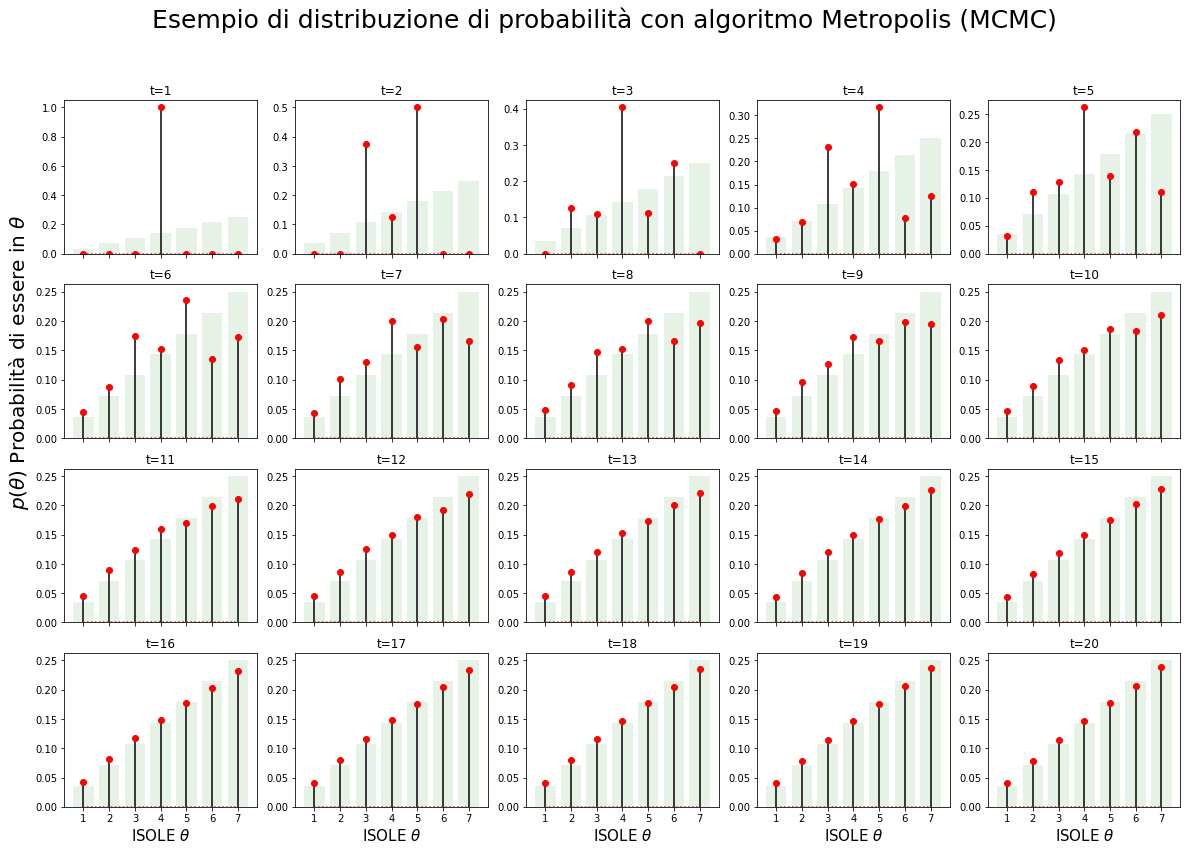

In [323]:
from copy import deepcopy

target = [i/np.sum(range(len(isole)+1)) for i in isole]

tempi = 20

P = [0 for _ in range(len(isole)+2)]
inizio = 4

P[inizio] = 1

fig, ax = plt.subplots(4, 5, figsize=(20, 13), sharex=True)
fig.suptitle("Esempio di distribuzione di probabilità con algoritmo Metropolis (MCMC)", fontsize=25)
ax[0,0].set_xticks([i for i in isole])
ax[1,0].set_ylabel(r"$p(\theta)$ Probabilità di essere in $\theta$", fontsize=20)

for tempo in range(tempi):
    ax.flat[tempo].set_title(f"t={tempo+1}")
    ax.flat[tempo].stem(
        [i for i in isole],
        P[1:8], use_line_collection=True,
        markerfmt="ro",
        linefmt="k-",
        basefmt="C3:"
    )
    ax.flat[tempo].bar(
        [i for i in isole],
        target, color="g", alpha=.1,
        zorder=1
    )
    if tempo >= 5*3:
        ax.flat[tempo].set_xlabel(r"ISOLE $\theta$", fontsize=15)
        
    _P = deepcopy(P)
    for i, p in enumerate(_P):
        if not i or i > len(isole):
            continue
        da_precedente = _P[i-1] * .5
        da_successiva = _P[i+1] * .5 * i/(i+1)
        verso_successiva = _P[i] * .5
        if i == len(isole):
            verso_successiva = 0
        verso_precedente = _P[i] * .5 * (i-1)/i
        da_attuale = P[i] - (verso_successiva + verso_precedente)
        P[i] = da_precedente + da_successiva + da_attuale

plt.savefig("metropolis.png", bbox_inches='tight')

In [64]:
isole = {}
for isola in range(7):
    isole.update({isola+1: np.random.randint(1e6)})

In [65]:
percorso_A = simulazione2(isole, spostamenti=1000)
percorso_B = simulazione2(isole, spostamenti=2000)
percorso_C = simulazione2(isole, spostamenti=3000)

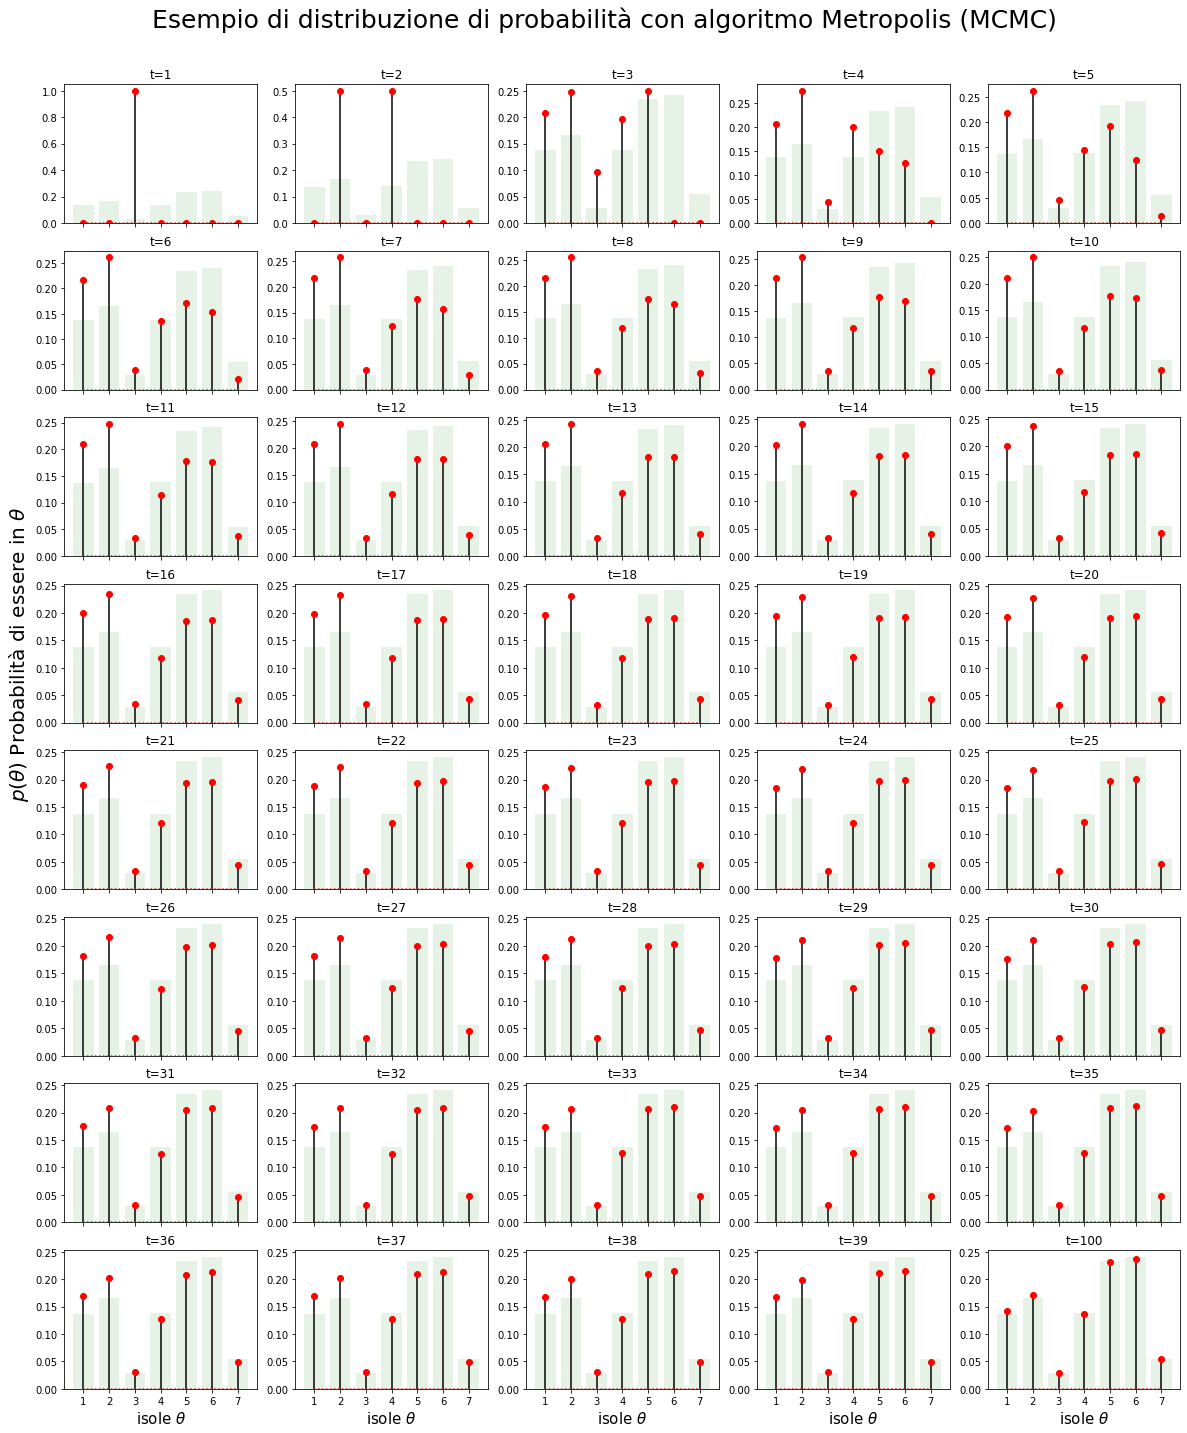

In [88]:
from copy import deepcopy

pop_tot = sum([isole[i] for i in isole])
target = [isole[i]/pop_tot for i in isole]

tempi = 100

_isole = deepcopy(isole)
_isole.update({0:0})
_isole.update({len(isole)+1: 0})
P = [0 for _ in range(len(_isole))]
inizio = 3

P[inizio] = 1


fig, ax = plt.subplots(8, 5, figsize=(20, 24), sharex=True)
fig.suptitle("Esempio di distribuzione di probabilità con algoritmo Metropolis (MCMC)", fontsize=25, y=.925)
ax[0,0].set_xticks([i for i in _isole])
ax[3,0].set_ylabel(r"$p(\theta)$ Probabilità di essere in $\theta$", fontsize=20)

j = 0
for tempo in range(tempi):
    if tempo < 39 or tempo == 99:
        if tempo == 99:
            j = 39
        ax.flat[j].set_title(f"t={tempo+1}")
        ax.flat[j].stem(
            [i for i in isole],
            P[1:8], use_line_collection=True,
            markerfmt="ro",
            linefmt="k-",
            basefmt="C3:"
        )
        ax.flat[j].bar(
            [i for i in isole],
            target, color="g", alpha=.1,
            zorder=1
        )
        if tempo >= 5*7:
            ax.flat[j].set_xlabel(r"isole $\theta$", fontsize=15)
        j += 1
        
    _P = deepcopy(P)
    for i, p in enumerate(_P):
        if not i or i > len(isole):
            continue

        if _isole[i-1] < _isole[i]:
            to_precedente = _P[i] * .5 * _isole[i-1]/_isole[i]
            da_precedente = _P[i-1] * .5
        else:
            to_precedente = _P[i] * .5
            da_precedente = _P[i-1] * .5 * _isole[i]/_isole[i-1]

        if _isole[i+1] > _isole[i]:
            to_successiva = _P[i] * .5
            da_successiva = _P[i+1] * .5 * _isole[i]/_isole[i+1]
        else:
            to_successiva = _P[i] * .5 * _isole[i+1]/_isole[i]
            da_successiva = _P[i+1] * .5
            
        if i == len(isole):
            to_successiva = 0

        da_attuale = P[i] - (to_successiva + to_precedente)
        P[i] = da_precedente + da_successiva + da_attuale

plt.savefig("metropolis2.png", bbox_inches='tight')

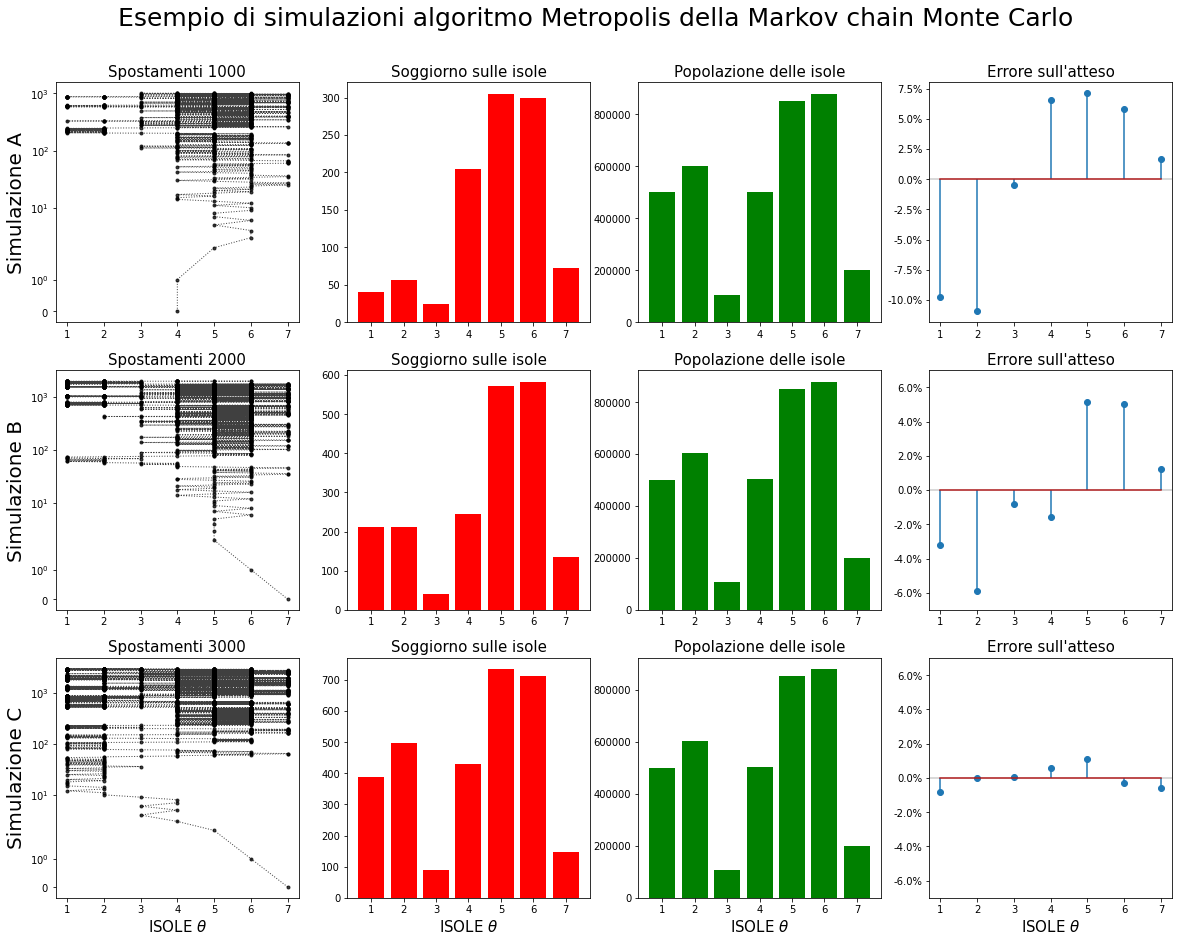

In [68]:
fig, ax = plt.subplots(3, 4, figsize=(20,15))

fig.suptitle(
    "Esempio di simulazioni algoritmo Metropolis della Markov chain Monte Carlo",
    fontsize=25, y=.95
)

ax[0,0].set_ylabel("Simulazione A", fontsize=20)
ax[0,0].set_title(f"Spostamenti {len(percorso_A)}", fontsize=15)
ax[0,0].plot(
    percorso_A,
    [i for i in range(len(percorso_A))],
    "o:", c="k", lw=1, markersize=3, alpha=.75
)
ax[0,0].set_yscale("symlog")

ax[0,1].set_title("Soggiorno sulle isole", fontsize=15)
ax[0,1].bar(
    [i for i in isole],
    [percorso_A.count(i) for i in isole],
    color="r"
)

ax[0,2].set_title("Popolazione delle isole", fontsize=15)
ax[0,2].bar(
    [i for i in isole],
    [isole[i] for i in isole],
    color="g"
)

ax[0,3].set_title("Errore sull'atteso", fontsize=15)
popolazione_totale = sum(isole[i] for i in isole)
ax[0,3].stem(
    [i for i in isole],
    [(percorso_A.count(i)/len(percorso_A)-isole[i]/popolazione_totale)*100 for i in isole],
    use_line_collection=True,
)
#ax[0,3].set_ylim(-7, +7)
ax[0,3].axhline(0, c="k", alpha=.2)
ax[0,3].yaxis.set_major_formatter(mtick.PercentFormatter())

# Simulazione B
ax[1,0].set_ylabel("Simulazione B", fontsize=20)
ax[1,0].set_title(f"Spostamenti {len(percorso_B)}", fontsize=15)
ax[1,0].plot(
    percorso_B,
    [i for i in range(len(percorso_B))],
    "o:", c="k", lw=1, markersize=3, alpha=.75
)
ax[1,0].set_yscale("symlog")

ax[1,1].set_title("Soggiorno sulle isole", fontsize=15)
ax[1,1].bar(
    [i for i in isole],
    [percorso_B.count(i) for i in isole],
    color="r"
)

ax[1,2].set_title("Popolazione delle isole", fontsize=15)
ax[1,2].bar(
    [i for i in isole],
    [isole[i] for i in isole],
    color="g"
)

ax[1,3].set_title("Errore sull'atteso", fontsize=15)
popolazione_totale = sum(isole[i] for i in isole)
ax[1,3].stem(
    [i for i in isole],
    [(percorso_B.count(i)/len(percorso_B)-isole[i]/popolazione_totale)*100 for i in isole],
    use_line_collection=True,
)
ax[1,3].set_ylim(-7, +7)
ax[1,3].axhline(0, c="k", alpha=.2)
ax[1,3].yaxis.set_major_formatter(mtick.PercentFormatter())

# Simulazione C
ax[2,0].set_ylabel("Simulazione C", fontsize=20)
ax[2,0].set_title(f"Spostamenti {len(percorso_C)}", fontsize=15)
ax[2,0].set_xlabel(r"ISOLE $\theta$", fontsize=15)
ax[2,0].plot(
    percorso_C,
    [i for i in range(len(percorso_C))],
    "o:", c="k", lw=1, markersize=3, alpha=.75
)
ax[2,0].set_yscale("symlog")

ax[2,1].set_title("Soggiorno sulle isole", fontsize=15)
ax[2,1].set_xlabel(r"ISOLE $\theta$", fontsize=15)
ax[2,1].bar(
    [i for i in isole],
    [percorso_C.count(i) for i in isole],
    color="r"
)

ax[2,2].set_title("Popolazione delle isole", fontsize=15)
ax[2,2].set_xlabel(r"ISOLE $\theta$", fontsize=15)
ax[2,2].bar(
    [i for i in isole],
    [isole[i] for i in isole],
    color="g"
)

ax[2,3].set_title("Errore sull'atteso", fontsize=15)
ax[2,3].set_xlabel(r"ISOLE $\theta$", fontsize=15)
popolazione_totale = sum(isole[i] for i in isole)
ax[2,3].stem(
    [i for i in isole],
    [(percorso_C.count(i)/len(percorso_C)-isole[i]/popolazione_totale)*100 for i in isole],
    use_line_collection=True,
)
ax[2,3].set_ylim(-7, +7)
ax[2,3].axhline(0, c="k", alpha=.2)
ax[2,3].yaxis.set_major_formatter(mtick.PercentFormatter())

plt.savefig("MCMC2.png", bbox_inches='tight')

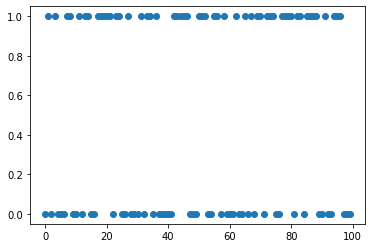

In [11]:
plt.scatter(np.arange(100), sps.bernoulli.rvs(.5, size=100))

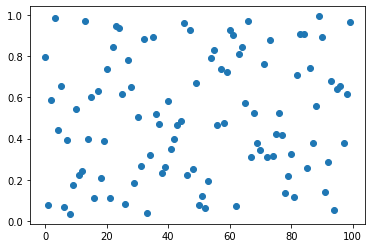

In [10]:
plt.scatter(np.arange(100), sps.uniform.rvs(size=100))

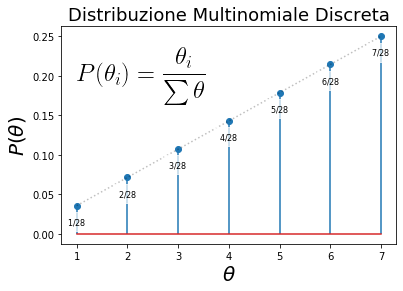

In [115]:
# Categorical distribution
#
# http://bois.caltech.edu/distribution_explorer/discrete/categorical.html
# https://en.wikipedia.org/wiki/Categorical_distribution
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html?highlight=rv_discrete#scipy.stats.rv_discrete

theta = np.arange(7)
ptheta = np.arange(8)[1:]
Ptheta = [p/sum(ptheta) for p in ptheta]
plt.stem(
    ptheta,
    sps.rv_discrete(values=(theta, Ptheta)).pmf(theta),
    use_line_collection=True
)
plt.title(r"Distribuzione Multinomiale Discreta", fontsize=18)
plt.text(1, .2, 
         r"$$P(\theta_i)=\frac{\theta_i}{\sum{\theta}}$$", 
         fontsize=25, usetex=True, va="center")
for t in theta:
    plt.text(
        ptheta[t], Ptheta[t]-.013,
        f"${ptheta[t]}/{sum(ptheta)}$",
        ha="center", va="top",
        fontsize=8,
        backgroundcolor=(1,1,1,.7)
    )
plt.plot(
    [1, 7],
    [Ptheta[0], Ptheta[6]],
    c="k", ls=":", alpha=.25,
)
plt.xlabel(r"$\theta$", fontsize=20)
plt.ylabel(r"$P(\theta)$", fontsize=20)
plt.plot();

In [52]:
z = np.zeros(7)
z[3] = 1

random_walk = [z]
positions = sps.rv_discrete(values=(theta, Ptheta)).rvs(size=1000)
for position in positions:
    z = np.zeros(7)
    random_move = np.random.randint(-1, 2)
    last_position = random_walk[-1].argmax()
    new_position = abs(last_position+random_move)
    if new_position > 6:
        new_position = 6
    z[new_position] = 1
    random_walk.append(z)

In [53]:
random_walk

[array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([1., 0., 0., 0., 0., 0., 0.]),
 array([0., 1., 0., 0., 0., 0., 0.]),
 array([0., 0., 1., 0., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 0., 1., 0.]),
 array([0., 0., 0., 0., 1., 0., 0.]),
 array([0., 0., 0., 1., 0., 0., 0.]),
 array([0., 

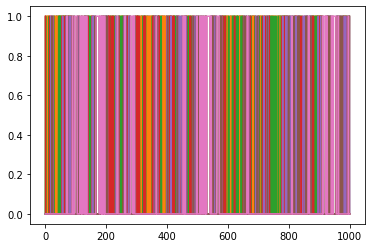

In [54]:
plt.plot(random_walk)